In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('../DB/unknome_db_03_Nov_2023.sqlite')

KeyboardInterrupt: 

```python
# Leer datos de la tabla en un DataFrame de Pandas
df = pd.read_sql_query(consulta, conn)
```

In [ ]:
consulta = "SELECT * FROM Protein LIMIT 5"
df = pd.read_sql_query(consulta, conn)

df

,id,accessions,name,gene_name,orf_name,subcell_locs,fasta_header,species,species_aka,species_id,...,panther_db_xref,panther_db_name,organism_db_xref,organism_db_name,organism_db,clust_id,knownness,features,sequence,align_seq
0,RBL_AMBTC,Q70XZ5,Ribulose bisphosphate carboxylase large chain ...,rbcL,,pla,sp|Q70XZ5|RBL_AMBTC Ribulose bisphosphate carb...,Amborella trichopoda,None,13333,...,PTHR42704,RIBULOSE BISPHOSPHATE CARBOXYLASE,ERM97892,None,EnsemblPlants,UKP00000,None,ACT_SITE:2;BINDING:9;CHAIN:1;DISULFID:1;MOD_RE...,MSPKTETKASAGFKAGVKDYRLTYYTPDYETLATDILAAFRVTPQP...,None
1,PSBA_AMBTC,Q70Y17,Photosystem II protein D1 (PSII D1 protein) (E...,psbA,,pla,sp|Q70Y17|PSBA_AMBTC Photosystem II protein D1...,Amborella trichopoda,None,13333,...,PTHR33149,PHOTOSYSTEM II PROTEIN D1,ERM97892,None,EnsemblPlants,UKP00001,None,BINDING:13;CHAIN:1;INIT_MET:1;MOD_RES:2;PROPEP...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,None
2,PETL_AMBTC,Q70XY8;Q5K3V0,Cytochrome b6-f complex subunit 6 (Cytochrome ...,petL,,pla,sp|Q70XY8|PETL_AMBTC Cytochrome b6-f complex s...,Amborella trichopoda,None,13333,...,PTHR37266,CYTOCHROME B6-F COMPLEX SUBUNIT 6,ERM97892,None,EnsemblPlants,UKP00002,None,CHAIN:1;TRANSMEM:1,MLTITSYFGFLLAALTITSALLIGLNKIRLI,None
3,NU4LC_AMBTC,Q70XW2,"NAD(P)H-quinone oxidoreductase subunit 4L, chl...",ndhE,,pla,sp|Q70XW2|NU4LC_AMBTC NAD(P)H-quinone oxidored...,Amborella trichopoda,None,13333,...,PTHR11434,NADH-UBIQUINONE OXIDOREDUCTASE SUBUNIT ND4L,ERM97892,None,EnsemblPlants,UKP00003,None,CHAIN:1;TRANSMEM:3,MMFEYALVLSSYLFSMGIYGLITSRNMVRALMCLELILNAVNMNLV...,None
4,NU6C_AMBTC,Q70XW1,"NAD(P)H-quinone oxidoreductase subunit 6, chlo...",ndhG,,pla,sp|Q70XW1|NU6C_AMBTC NAD(P)H-quinone oxidoredu...,Amborella trichopoda,None,13333,...,PTHR33269,NADH-UBIQUINONE OXIDOREDUCTASE CHAIN 6,ERM97892,None,EnsemblPlants,UKP00004,None,CHAIN:1;TRANSMEM:5,MDLLGPIHDILLVSLGSGIILGSLGVVLLTNPIYSAFSSGLVLVRI...,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5 non-null      object
 1   accessions        5 non-null      object
 2   name              5 non-null      object
 3   gene_name         5 non-null      object
 4   orf_name          5 non-null      object
 5   subcell_locs      5 non-null      object
 6   fasta_header      5 non-null      object
 7   species           5 non-null      object
 8   species_aka       0 non-null      object
 9   species_id        5 non-null      int64 
 10  tax_id            5 non-null      int64 
 11  tax_name          5 non-null      object
 12  tax_lineage       5 non-null      object
 13  pubmed_ids        5 non-null      object
 14  embl_ids          5 non-null      object
 15  pfam_ids          5 non-null      object
 16  interpro_ids      5 non-null      object
 17  panther_db_xref   5 

In [ ]:
consulta = "SELECT DISTINCT species FROM Protein"
df = pd.read_sql_query(consulta, conn)

df

,species
0,Amborella trichopoda
1,Anolis carolinensis
2,Anopheles gambiae
3,Aquifex aeolicus
4,Arabidopsis thaliana
...,...
135,Xenopus tropicalis
136,Yarrowia lipolytica
137,Yersinia pestis
138,Zea mays


In [ ]:
consulta = '''SELECT species, COUNT(*) as ocurrencias 
FROM Protein
GROUP BY species;'''

df = pd.read_sql_query(consulta, conn)

df

,species,ocurrencias
0,Amborella trichopoda,18405
1,Anolis carolinensis,20594
2,Anopheles gambiae,11071
3,Aquifex aeolicus,1260
4,Arabidopsis thaliana,24459
...,...,...
135,Xenopus tropicalis,20984
136,Yarrowia lipolytica,5157
137,Yersinia pestis,2946
138,Zea mays,32055


In [ ]:
df.sort_values("ocurrencias", ascending=False)

,species,ocurrencias
129,Triticum aestivum,95713
51,Gossypium hirsutum,58359
83,Nicotiana tabacum,57485
54,Helianthus annuus,53556
49,Glycine max,48958
...,...,...
84,Nitrosopumilus maritimus,1104
55,Helicobacter pylori,983
21,Chlamydia trachomatis,621
78,Mycoplasma genitalium,351


In [ ]:
df.loc[df["species"] == "Homo sapiens"]

,species,ocurrencias
57,Homo sapiens,19916


In [ ]:
consulta = "SELECT DISTINCT species_aka FROM Protein"
df = pd.read_sql_query(consulta, conn)

df


,species_aka
0,None


In [ ]:
consulta = "SELECT DISTINCT pfam_ids FROM Protein"
df = pd.read_sql_query(consulta, conn)

df

,pfam_ids
0,PF00016;PF02788
1,PF00124
2,PF05115
3,PF00420
4,PF00499
...,...
40690,PF01541;PF12826;PF08459
40691,PF07733;PF17657;PF02811
40692,PF00226;PF01556;PF16713
40693,PF00773;PF00575


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40695 entries, 0 to 40694
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pfam_ids  40694 non-null  object
dtypes: object(1)
memory usage: 318.1+ KB


Solo hay una proteína que no tiene un id de pfam.

In [ ]:
df["nro_pfams"] = df["pfam_ids"].str.count(';') + 1

recuento = df["nro_pfams"].value_counts().reset_index()
recuento.columns = ['nro_pfams', 'count']

recuento.sort_values("nro_pfams")

,nro_pfams,count
1,1.0,9099
0,2.0,15898
2,3.0,8462
3,4.0,4028
4,5.0,1832
5,6.0,766
6,7.0,297
7,8.0,149
8,9.0,84
9,10.0,44


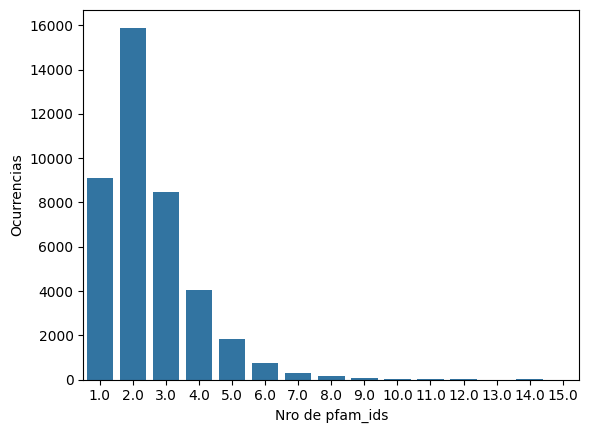

In [ ]:
sns.barplot(data=recuento, x="nro_pfams", y="count")
plt.ylabel("Ocurrencias")
plt.xlabel("Nro de pfam_ids")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Cerrar la conexión
# conn.close()